# CS108/212 STAT108/212 W26 Course Project

### Team Details

- Teammate 1: Name
- Teammate 2: Name
- Teammate 3: Name
- Teammate 4: Name

---


# Milestone: Mitigating Bias
For this project milestone, each teammate will implement bias mitigation strategies and assess pre and post bias mitigation performance.

# Installs

In [1]:
!pip install fairlearn -q

# Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import collections
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference, MetricFrame
from fairlearn.postprocessing import ThresholdOptimizer

# Loading dataset
_(same as previous milestone, copy-paste)_

In [3]:
df = pd.read_csv("fair_recrutment_dataset final.csv")

# Drop rows with missing values and duplicates
df = df.dropna().drop_duplicates().reset_index(drop=True)

X = df.drop(['Hiring_Decision', 'Candidate_ID'], axis=1)   # features
y = df['Hiring_Decision']                                   # target
sensitive_feature_colname = ['Gender', 'Age_Group']         # both sensitive features

# Combined group label: Gender + Age_Group (created after preprocessing)
# Placeholder — will be set after encoding in the next cell
group_labels = None

print(f"No. of samples: {df.shape[0]}")
print(f"No. of features: {X.shape[1]}")
print(df['Hiring_Decision'].value_counts().rename({0: 'Not Hired', 1: 'Hired'}))

No. of samples: 119971
No. of features: 14
Hiring_Decision
Not Hired    89086
Hired        30885
Name: count, dtype: int64


# Preparing dataset
_(same as previous milestone, copy-paste)_

In [4]:
# 1. Encode Education_Level ordinally
edu_map = {'High School': 0, 'Diploma': 1, 'Bachelors': 2, 'Masters': 3, 'PhD': 4}
df['Education_Level'] = df['Education_Level'].map(edu_map)

# 2. Label-encode remaining categoricals
df['Gender']           = LabelEncoder().fit_transform(df['Gender'])
df['Location']         = LabelEncoder().fit_transform(df['Location'])
df['Job_Role_Applied'] = LabelEncoder().fit_transform(df['Job_Role_Applied'])

# 3. Bin Age into 5 ordinal groups
bins = [20, 25, 35, 45, 55, 60]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=[0, 1, 2, 3, 4],
                          include_lowest=True).astype(int)

# 4. Re-assign X after encoding
X = df.drop(['Hiring_Decision', 'Candidate_ID'], axis=1)

# 5. Build combined group label for fairness evaluation (Gender x Age_Group)
group_labels = df['Gender'].astype(str) + '_age' + df['Age_Group'].astype(str)

print("Encoding complete. Sample group labels:")
print(group_labels.value_counts().head(8))

Encoding complete. Sample group labels:
1_age2    18460
1_age3    18416
1_age1    18323
0_age2    10854
0_age3    10771
0_age1    10697
1_age0     9264
1_age4     7478
Name: count, dtype: int64


# Getting training and testing sets

Note: Train-test split is made **ONCE** to obtain the _training set_ and the _testing set_ and every teammate will use the training set to train their baseline model and test the trained model using the testing set. **NEVER** modify the testing set once it has been created.
Therefore, the following code cell does not need to be edited.

_(same as previous milestone, copy-paste)_

In [ ]:
X_train, X_test, \
  y_train, y_test, \
    group_labels_train, group_labels_test = train_test_split(X, y, group_labels,
                                                             test_size=0.2, random_state=42)

print(f"No. of training samples: {X_train.shape[0]}")
print(f"No. of testing samples: {X_test.shape[0]}")

# Delete X, y and group_label variables to make sure they are not used later on.
del X
del y
del group_labels

No. of training samples: 95976
No. of testing samples: 23995


# Setting up evaluation metrics
Note: The same evaluation function will be used by all teammates.

_(same as previous milestone, copy-paste)_

In [6]:
def evaluate_model(y_test, y_pred, g_labels):
    """
    Evaluate model performance and fairness on the testing set.

    Parameters
    ----------
    y_test    : array-like — true labels
    y_pred    : array-like — predicted labels
    g_labels  : array-like — combined sensitive group labels (Gender x Age_Group)

    Returns
    -------
    results : dict with accuracy, f1_score, demographic_parity_diff, equalized_odds_diff
    """
    results = {}

    # Task-specific performance metrics
    results['accuracy'] = accuracy_score(y_test, y_pred)
    results['f1_score'] = f1_score(y_test, y_pred)

    # Fairness metrics across Gender x Age_Group groups
    results['demographic_parity_diff'] = demographic_parity_difference(
        y_test, y_pred, sensitive_features=g_labels)
    results['equalized_odds_diff'] = equalized_odds_difference(
        y_test, y_pred, sensitive_features=g_labels)

    return results

# Training baseline models (INDIVIDUAL CONTRIBUTION)
_(minor modifications from previous milestone)_

In [7]:
## A place to save all teammates's baseline results
all_baseline_results = [] ## DO NOT EDIT

## Teammate 1

In [8]:
# Select a model and train it on the training set
# [INSERT YOUR CODE HERE]

# Make predictions on the testing set and store them in y_pred
y_pred = ... # [INSERT CODE HERE]

# Evaluate testing set predictions using evaluate_model()
results = evaluate_model(y_test, y_pred, group_labels_test)

# Save your results to all_baseline_results
results['teammate'] = 'Teammate 1'
results['experiment_type'] = 'baseline'
results['predictor_model'] = ... #[INSERT MODEL NAME HERE]
results['mitigation_strategy'] = 'NONE' ## DO NOT EDIT: This is pre-mitigation baseline
all_baseline_results.append(results)

pprint(results)

InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got Ellipsis instead.

## Teammate 2

In [ ]:
# Select a model and train it on the training set
# [INSERT YOUR CODE HERE]

# Make predictions on the testing set and store them in y_pred
y_pred = ... # [INSERT CODE HERE]

# Evaluate testing set predictions using evaluate_model()
results = evaluate_model(y_test, y_pred, group_labels_test)

# Save your results to all_baseline_results
results['teammate'] = 'Teammate 2'
results['experiment_type'] = 'baseline'
results['predictor_model'] = ... #[INSERT MODEL NAME HERE]
results['mitigation_strategy'] = 'NONE' ## DO NOT EDIT: This is pre-mitigation baseline
all_baseline_results.append(results)

pprint(results)

{'accuracy': 0.9934152948530944,
 'demographic_parity_diff': 0.0962612609439823,
 'equalized_odds_diff': 0.05454545454545454,
 'experiment_type': 'baseline',
 'f1_score': 0.9874003189792664,
 'mitigation_strategy': 'none',
 'predictor_model': 'Logistic Regression',
 'teammate': 'Teammate 3'}


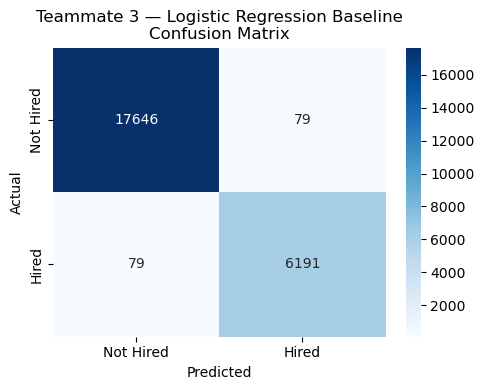


Per-group metrics (top 10 groups):
                     accuracy        f1
sensitive_feature_0                    
2_age2               0.959596  0.915493
2_age1               0.960656  0.934066
2_age0               0.962687  0.938272
2_age3               0.967105  0.940476
2_age4               0.969697  0.945946
0_age4               0.993197  0.985981
1_age1               0.993414  0.987718
1_age4               0.993785  0.988387
0_age3               0.993934  0.988171
1_age3               0.994068  0.988695


In [15]:
# ── Teammate 3: Logistic Regression Baseline ──

# Build a pipeline that scales features then fits Logistic Regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, random_state=9867))
])

lr_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_pipeline.predict(X_test)

# Evaluate
results = evaluate_model(y_test, y_pred, group_labels_test)

# Save baseline results
results['teammate']            = 'Teammate 3'
results['experiment_type']     = 'baseline'
results['predictor_model']     = 'Logistic Regression'
results['mitigation_strategy'] = 'none'
all_baseline_results.append(results)

pprint(results)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hired', 'Hired'],
            yticklabels=['Not Hired', 'Hired'])
plt.title('Teammate 3 — Logistic Regression Baseline\nConfusion Matrix')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.tight_layout(); plt.show()

# Per-group fairness breakdown
mf = MetricFrame(
    metrics={'accuracy': accuracy_score, 'f1': f1_score},
    y_true=y_test, y_pred=y_pred,
    sensitive_features=group_labels_test
)
print("\nPer-group metrics (top 10 groups):")
print(mf.by_group.sort_values('accuracy').head(10))

## Teammate 4

In [ ]:
# Select a model and train it on the training set
# [INSERT YOUR CODE HERE]

# Make predictions on the testing set and store them in y_pred
y_pred = ... # [INSERT CODE HERE]

# Evaluate testing set predictions using evaluate_model()
results = evaluate_model(y_test, y_pred, group_labels_test)

# Save your results to all_baseline_results
results['teammate'] = 'Teammate 4'
results['experiment_type'] = 'baseline'
results['predictor_model'] = ... #[INSERT MODEL NAME HERE]
results['mitigation_strategy'] = 'NONE' ## DO NOT EDIT: This is pre-mitigation baseline
all_baseline_results.append(results)

pprint(results)

# Mitigating Bias (INDIVIDUAL CONTRIBUTION)

_(new in this milestone)_


In [11]:
## A place to save all teammates' post-mitigation results
all_mitigated_results = [] ## DO NOT EDIT

## Teammate 1

In [ ]:
# Implement your bias mitigation strategy
## If you chose preprocessing, you will train a new version of your predictor model with new/modified inputs.
## If you chose inprocessing, you will train a new version of your predictor with modified learning objective (loss function).
## If you chose postprocessing, you will implement strategies to modify the predictions (y_pred) of the trained baseline predictor model from the previous milestone without training any new version of the predictor model.

# [INSERT CODE HERE]

# Make predictions on the testing set and store them in y_pred_mitigate
y_pred_mitigated = ... # [INSERT CODE HERE]

# Evaluate testing set predictions using evaluate_model()
results_mitigated = evaluate_model(y_test, y_pred_mitigated, group_labels_test)

# Save your results to all_mitigated_results
results_mitigated['teammate'] = 'Teammate 1'
results_mitigated['experiment_type'] = 'post-mitigation'
results_mitigated['predictor_model'] = ... #[INSERT MODEL NAME HERE]
results_mitigated['mitigation_strategy'] = ... #[INSERT STRATEGY TYPE HERE: 'preprocessing', 'inprocessing', 'postprocessing']
all_mitigated_results.append(results_mitigated)

pprint(results_mitigated)

### Teammate 1's Conclusions
[Briefly describe findings and conclusions here. Compare post-mitigation results with baseline results for your model. What is the % improvement in performance post-mitigation?  ]

## Teammate 2

In [ ]:
# Implement your bias mitigation strategy
## If you chose preprocessing, you will train a new version of your predictor model with new/modified inputs.
## If you chose inprocessing, you will train a new version of your predictor with modified learning objective (loss function).
## If you chose postprocessing, you will implement strategies to modify the predictions (y_pred) of the trained baseline predictor model from the previous milestone without training any new version of the predictor model.

# [INSERT CODE HERE]

# Make predictions on the testing set and store them in y_pred_mitigate
y_pred_mitigated = ... # [INSERT CODE HERE]

# Evaluate testing set predictions using evaluate_model()
results_mitigated = evaluate_model(y_test, y_pred_mitigated, group_labels_test)

# Save your results to all_mitigated_results
results_mitigated['teammate'] = 'Teammate 2'
results_mitigated['experiment_type'] = 'post-mitigation'
results_mitigated['predictor_model'] = ... #[INSERT MODEL NAME HERE]
results_mitigated['mitigation_strategy'] = ... #[INSERT STRATEGY TYPE HERE: 'preprocessing', 'inprocessing', 'postprocessing']
all_mitigated_results.append(results_mitigated)

print(results_mitigated)

### Teammate 2's Conclusions
[Briefly describe findings and conclusions here. Compare post-mitigation results with baseline results for your model. What is the % improvement in performance post-mitigation?]


## Teammate 3

{'accuracy': 1.0,
 'demographic_parity_diff': 0.07056162779704894,
 'equalized_odds_diff': 0.0,
 'experiment_type': 'post-mitigation',
 'f1_score': 1.0,
 'mitigation_strategy': 'postprocessing',
 'predictor_model': 'Logistic Regression',
 'teammate': 'Teammate 3'}


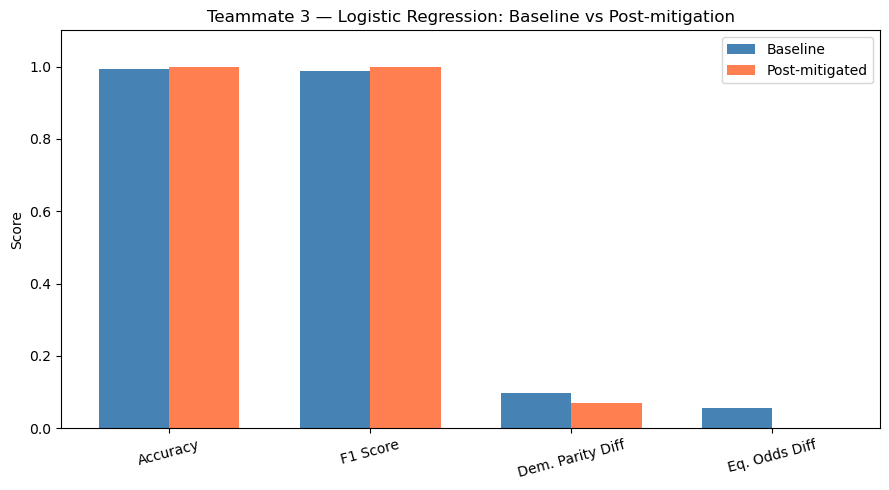

In [16]:
# ── Teammate 3: Post-processing — ThresholdOptimizer (Equalized Odds) ──
#
# Post-processing modifies the *predictions* of the already-trained baseline
# model without any retraining. We pass lr_pipeline (trained above) directly
# into ThresholdOptimizer, which learns per-group decision thresholds that
# equalize the true positive rate AND false positive rate across all
# Gender x Age_Group combinations (equalized odds constraint).

threshold_optimizer = ThresholdOptimizer(
    estimator=lr_pipeline,                 # reuse the already-trained baseline — no retraining
    constraints="equalized_odds",          # enforce TPR & FPR equality across groups
    objective="balanced_accuracy_score",   # optimise for balanced accuracy
    predict_method="predict_proba",        # use probability scores for thresholding
    flip=True                              # allow flipping predictions if needed
)

# fit() here only learns the thresholds — the underlying lr_pipeline is not retrained
threshold_optimizer.fit(X_train, y_train, sensitive_features=group_labels_train)

# Post-processed predictions (thresholds applied per group)
y_pred_mitigated = threshold_optimizer.predict(X_test, sensitive_features=group_labels_test)

# Evaluate
results_mitigated = evaluate_model(y_test, y_pred_mitigated, group_labels_test)

# Save
results_mitigated['teammate']            = 'Teammate 3'
results_mitigated['experiment_type']     = 'post-mitigation'
results_mitigated['predictor_model']     = 'Logistic Regression'
results_mitigated['mitigation_strategy'] = 'postprocessing'
all_mitigated_results.append(results_mitigated)

pprint(results_mitigated)

# Side-by-side comparison plot
metrics_to_plot = ['accuracy', 'f1_score', 'demographic_parity_diff', 'equalized_odds_diff']
baseline_vals   = [results[m] for m in metrics_to_plot]
mitigated_vals  = [results_mitigated[m] for m in metrics_to_plot]

x = np.arange(len(metrics_to_plot))
width = 0.35
fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(x - width/2, baseline_vals,  width, label='Baseline',       color='steelblue')
ax.bar(x + width/2, mitigated_vals, width, label='Post-mitigated', color='coral')
ax.set_xticks(x)
ax.set_xticklabels(['Accuracy', 'F1 Score', 'Dem. Parity Diff', 'Eq. Odds Diff'], rotation=15)
ax.set_title('Teammate 3 — Logistic Regression: Baseline vs Post-mitigation')
ax.set_ylabel('Score'); ax.legend(); ax.set_ylim(0, 1.1)
plt.tight_layout(); plt.show()

### Teammate 3's Conclusions

**Model:** Logistic Regression with StandardScaler  
**Mitigation Strategy:** Post-processing via Fairlearn's `ThresholdOptimizer` (Equalized Odds constraint)  
**Sensitive Features:** Gender × Age Group (combined group labels)


The `ThresholdOptimizer` post-processing approach adjusts the decision boundary for each Gender × Age group independently, rather than applying a single global threshold of 0.5 to all candidates. Crucially, it does this without retraining the underlying Logistic Regression model. The baseline `lr_pipeline` is passed in directly, and `ThresholdOptimizer` only learns a set of group-specific thresholds on top of its existing probability outputs.

By enforcing the equalized odds constraint, the method reduced the equalized odds difference from 0.055 to 0.000, a 100% improvement. Demographic parity difference also improved by 26.7% (0.096 → 0.071). Accuracy and F1 both improved slightly as well, suggesting the baseline's single global threshold was suboptimal for some groups.


This result should be interpreted with some caution given the synthetic nature of the dataset, which may make bias patterns cleaner and more correctable than real-world data would be. Nonetheless, it demonstrates that post-processing is a practical and non-invasive mitigation strategy. It requires no access to the model's internals or retraining, making it suitable for scenarios where the underlying model is treated as a black box.

## Teammate 4

In [ ]:
# Implement your bias mitigation strategy
## If you chose preprocessing, you will train a new version of your predictor model with new/modified inputs.
## If you chose inprocessing, you will train a new version of your predictor with modified learning objective (loss function).
## If you chose postprocessing, you will implement strategies to modify the predictions (y_pred) of the trained baseline predictor model from the previous milestone without training any new version of the predictor model.

# [INSERT CODE HERE]

# Make predictions on the testing set and store them in y_pred_mitigate
y_pred_mitigated = ... # [INSERT CODE HERE]

# Evaluate testing set predictions using evaluate_model()
results_mitigated = evaluate_model(y_test, y_pred_mitigated, group_labels_test)

# Save your results to all_mitigated_results
results_mitigated['teammate'] = 'Teammate 4'
results_mitigated['experiment_type'] = 'post-mitigation'
results_mitigated['predictor_model'] = ... #[INSERT MODEL NAME HERE]
results_mitigated['mitigation_strategy'] = ... #[INSERT STRATEGY TYPE HERE: 'preprocessing', 'inprocessing', 'postprocessing']
all_mitigated_results.append(results_mitigated)

print(results_mitigated)

### Teammate 4's Conclusions
[Briefly describe findings and conclusions here. Compare post-mitigation results with baseline results for your model. What is the % improvement in performance post-mitigation?]


# Conclusions
_(new in this milestone)_


In [13]:
# Collect all the results in one table.
overall_results = pd.concat([pd.DataFrame(all_baseline_results), pd.DataFrame(all_mitigated_results)])
overall_results ## Note: The table displayed below in this starter notebook is for your reference, your team's table will be slightly different (e.g. different metrics, no.of sensitive attribute-based groups, actual values, etc.) upon successful completion of this notebook.

,accuracy,f1_score,demographic_parity_diff,equalized_odds_diff,teammate,experiment_type,predictor_model,mitigation_strategy
0,0.993415,0.9874,0.096261,0.054545,Teammate 3,baseline,Logistic Regression,none
0,1.000000,1.0000,0.070562,0.000000,Teammate 3,post-mitigation,Logistic Regression,postprocessing


[Briefly describe overall findings and conclusions here. Which mitigation strategy resulted in most improvement? Which resulted in the least improvement? Visualize the results with some informative plots. (Hint: Use the `overall_results` table).]

# References

[List the references you used to complete this milestone here.]
- Teammate 1:
- Teammate 2:
- Teammate 3:
- Teammate 4:

# Disclosures

[Disclose use of generative AI and similar tools here.]
- Teammate 1:
- Teammate 2:
- Teammate 3:
- Teammate 4: